Problem: Simple Pendulum Motion

The equation of motion for a straightforward pendulum is L * d2/dt2 + g * sin() = 0. It depicts how a pendulum swings when it is affected by gravity. A weight suspended from a pivot allows the pendulum to freely swing. The angle between the pendulum and the vertical is known as the angle. The pendulum's length is L, and the acceleration brought on by gravity is g. According to the equation, d2/dt2 is equal to -g * sin(), which is the second derivative of with respect to time. As a result, the pendulum's acceleration is inversely correlated with the sine of the angle. The acceleration is always in the direction of bringing the pendulum back to its equilibrium position, as indicated by the acceleration's negative sign.


To determine the expression for as a function of time, the equation can be solved. Because the answer is a periodic function, the pendulum will swing back and forth in a predictable way. The following equation provides the pendulum's period, T:

T = 2π√(L/g)

This equation demonstrates that the pendulum's period depends simply on its length and the acceleration caused by gravity. The period is unaffected by the pendulum's mass or the swing's amplitude.

A well-known illustration of a second-order differential equation is the equation of motion for a straightforward pendulum. It is a fundamental physics equation that has numerous uses, including the design of clocks and other timing devices.

Formulation:
The motion of a simple pendulum can be described by the following second-order differential equation:

L * d^2θ/dt^2 + g * sin(θ) = 0

where:

L is the length of the pendulum
θ(t) is the angular displacement of the pendulum at time t
g is the acceleration due to gravity
We can rewrite this equation as a system of first-order differential equations by introducing a new variable ω(t) representing the angular velocity:

dθ/dt = ω


dω/dt = -(g/L) * sin(θ)

we will solve using the Runge-Kutta 4th order method:

In [ ]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Defining Runge-Kutta Method:
def dX_dt(t, X):
    theta, omega = X
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])


L = 9.8  # length of the pendulum
g = 9.8  # acceleration due to gravity

# Initial conditions
theta0 = np.pi/12  # initial angular displacement
omega0 = 0.0  # initial angular velocity

# Time steps
t0 = 0.0
t_end = 30.0
dt = 0.01
num_steps = int((t_end - t0) / dt)

# Arrays to store solutions
t = np.linspace(t0, t_end, num_steps)
theta = np.zeros(num_steps)
omega = np.zeros(num_steps)

# Initial values
theta[0] = theta0
omega[0] = omega0

# Runge-Kutta 4th order method
for i in range(1, num_steps):
    k1 = dt * dX_dt(t[i-1], [theta[i-1], omega[i-1]])
    k2 = dt * dX_dt(t[i-1] + dt/2, [theta[i-1] + k1[0]/2, omega[i-1] + k1[1]/2])
    k3 = dt * dX_dt(t[i-1] + dt/2, [theta[i-1] + k2[0]/2, omega[i-1] + k2[1]/2])
    k4 = dt * dX_dt(t[i-1] + dt, [theta[i-1] + k3[0], omega[i-1] + k3[1]])
    theta[i] = theta[i-1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    omega[i] = omega[i-1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6

# Calculate angular displacement at specific time stamps
specific_time_stamps = [1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0, 21.0,  22.0, 23.0, 24.0]  # Add your desired time stamps here
specific_displacements = []
for t_stamp in specific_time_stamps:
    idx = int((t_stamp - t0) / dt)
    specific_displacements.append(theta[idx])

# Calculate angular velocity at specific time stamps
specific_velocities = []
for t_stamp in specific_time_stamps:
    idx = int((t_stamp - t0) / dt)
    specific_velocities.append(omega[idx])
    


In [ ]:
print(specific_displacements) #theta
print(specific_velocities)  #omega

[0.14253663200740377, -0.1070320179777804, -0.2586922025709712, -0.1746309373568033, 0.06896285206881243, 0.24944276905042834, 0.202554018926092, -0.029239480405375575, -0.23426612190916574, -0.22564726217096906, -0.011185704105643771, 0.21351616526658454, 0.24336874572297626, 0.05134237465524855, -0.18767879236727006, -0.2553044992388134, -0.09026707276754556, 0.15736201088037546, 0.26117670422442285, 0.12702774512826867, -0.12328295437010693, -0.26084898741931417, -0.16074708886253855, 0.08625177450961988]
[-0.21878306607418213, -0.23812481339490355, -0.039988363545514265, 0.19424161428592, 0.2517823604214927, 0.07904816418579166, -0.16510693735233706, -0.2594098323431757, -0.1162680653190256, 0.13208836653526315, 0.2608126314984941, 0.15077177845438788, -0.09597790148642528, -0.2559548534276535, -0.1817368626432571, 0.05763013108187611, 0.24496067884445305, 0.20841449683320395, -0.017942970511164204, -0.22810959074750203, -0.23014973569096978, -0.022160570356112137, 0.20582593001073

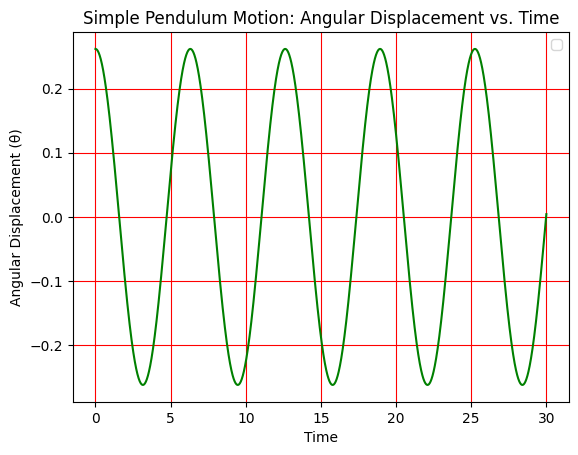

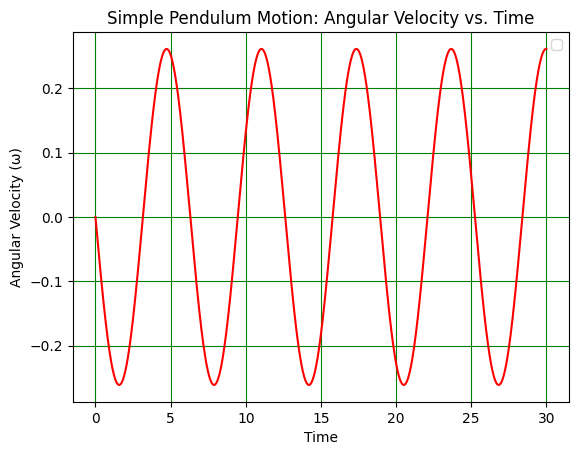

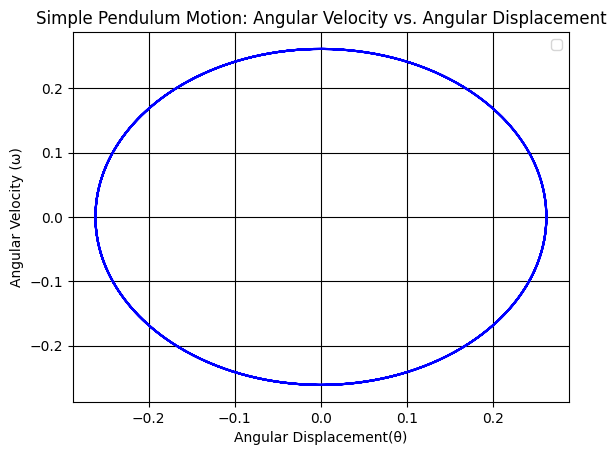

In [ ]:
# Plotting the solution
plt.plot(t, theta, color='green')
plt.xlabel('Time')
plt.grid(axis='both', which='both', color='r', linewidth=0.8)
plt.ylabel('Angular Displacement (θ)')
plt.title('Simple Pendulum Motion: Angular Displacement vs. Time')
plt.show()

plt.plot(t, omega, color='red')
plt.grid(axis='both', which='both', color='g', linewidth=0.8)
plt.xlabel('Time')
plt.ylabel('Angular Velocity (ω)')
plt.title('Simple Pendulum Motion: Angular Velocity vs. Time')
plt.show()

plt.plot(theta, omega, color='blue')
plt.grid(axis='both', which='both', color='black', linewidth=0.8)
plt.xlabel('Angular Displacement(θ)')
plt.ylabel('Angular Velocity (ω)')
plt.title('Simple Pendulum Motion: Angular Velocity vs. Angular Displacement')
plt.show()


# Manual values using Formulae

In [ ]:
#Reading from the datset which we have calculated manually:
import pandas as pd
df = pd.read_csv('data_analytical_final.csv')
print (df.columns)
print(df)

Index(['time', 'small_angle_theta', 'small_angle_omega ', 'Unnamed: 3',
       'Unnamed: 4', 'big_angle_theta', 'big_angle_omega '],
      dtype='object')
    time  small_angle_theta  small_angle_omega   Unnamed: 3  Unnamed: 4  \
0      1           0.141451           -0.220297         NaN         NaN   
1      2          -0.108947           -0.238054         NaN         NaN   
2      3          -0.259179           -0.036945         NaN         NaN   
3      4          -0.171124            0.198130         NaN         NaN   
4      5           0.074263            0.251046         NaN         NaN   
5      6           0.251372            0.073151         NaN         NaN   
6      7           0.197371           -0.171999         NaN         NaN   
7      8          -0.038092           -0.259013         NaN         NaN   
8      9          -0.238533           -0.107892         NaN         NaN   
9     10          -0.219668            0.142424         NaN         NaN   
10    11           0

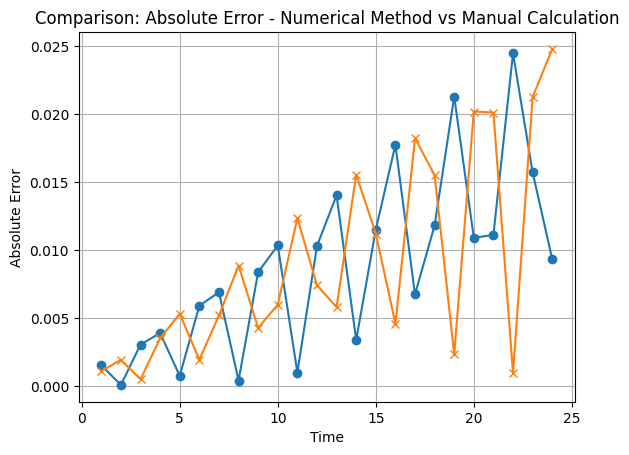

In [ ]:
#comparision of Absolute error.

# Values obtained using Runge-Kutta 4th Order Method
omega_rk4 = [-0.21878306607418213, -0.23812481339490355, -0.039988363545514265, 0.19424161428592, 0.2517823604214927, 0.07904816418579166, -0.16510693735233706, -0.2594098323431757, -0.1162680653190256, 0.13208836653526315, 0.2608126314984941, 0.15077177845438788, -0.09597790148642528, -0.2559548534276535, -0.1817368626432571, 0.05763013108187611, 0.24496067884445305, 0.20841449683320395, -0.017942970511164204, -0.22810959074750203, -0.23014973569096978, -0.022160570356112137, 0.20582593001073698, 0.24640127777100407]

# Manually Calculated Values
omega_manual = [-0.220296588673455,-0.238053509670305,-0.0369451317162843,0.198130429956484,0.251045788052553,0.0731508063700731,-0.171998689336824,-0.259013383280041,-0.107892367137005,0.14242439378065,0.261796823880119,0.140474461442117,-0.109999473014597,-0.259340399270251,-0.170244958446364,0.0753729120482587,0.251693274805706,0.196608001449794,-0.0392377617348057,-0.239008507734634,-0.219035933967446,0.00231726735344866,0.221539983756208,0.237079860777491] 

# Values obtained using Runge-Kutta 4th Order Method
theta_rk4 = [0.14253663200740377, -0.1070320179777804, -0.2586922025709712, -0.1746309373568033, 0.06896285206881243, 0.24944276905042834, 0.202554018926092, -0.029239480405375575, -0.23426612190916574, -0.22564726217096906, -0.011185704105643771, 0.21351616526658454, 0.24336874572297626, 0.05134237465524855, -0.18767879236727006, -0.2553044992388134, -0.09026707276754556, 0.15736201088037546, 0.26117670422442285, 0.12702774512826867, -0.12328295437010693, -0.26084898741931417, -0.16074708886253855, 0.08625177450961988]

# Manually Calculated Values
theta_manual = [0.141450812902748,-0.108946987042595,-0.259179429535748,-0.171123499780913,0.0742625864960414,0.251371993228,0.197371148647476,-0.0380918197758506,-0.238533344766687,-0.219668412631911,0.00115864502385562,0.220920449788055,0.23756901184397,0.0357977200161695,-0.198885830504853,-0.250714665668714,-0.0720375934466785,0.17287050997185,0.258842263755462,0.106835633954561,-0.143395185006394,-0.261789132173248,-0.139495358522455,0.111049804438077] 

# Time stamps
time_stamps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# Calculate absolute errors
error_o = np.abs(np.array(omega_rk4) - np.array(omega_manual))
error_t = np.abs(np.array(theta_rk4) - np.array(theta_manual))
# Plotting the absolute error
plt.plot(time_stamps, error_o, marker='o')
plt.plot(time_stamps, error_t, marker='x')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.title('Comparison: Absolute Error - Numerical Method vs Manual Calculation')
plt.grid(True)
plt.show()


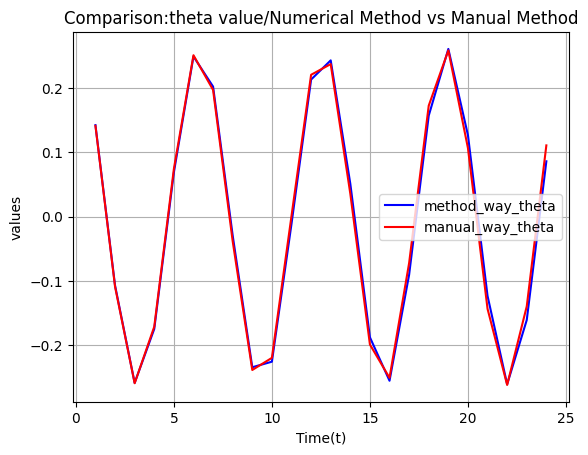

In [ ]:
#Theta value comparision between manually calulated and experimental data:
plt.title('Comparison:theta value/Numerical Method vs Manual Method')
plt.plot(time_stamps, theta_rk4, label="method_way_theta",color='blue')
plt.plot(time_stamps,theta_manual, label="manual_way_theta",color='red')
plt.xlabel('Time(t)')
plt.ylabel('values')
plt.grid(True)
plt.legend(loc='best')
plt.show()

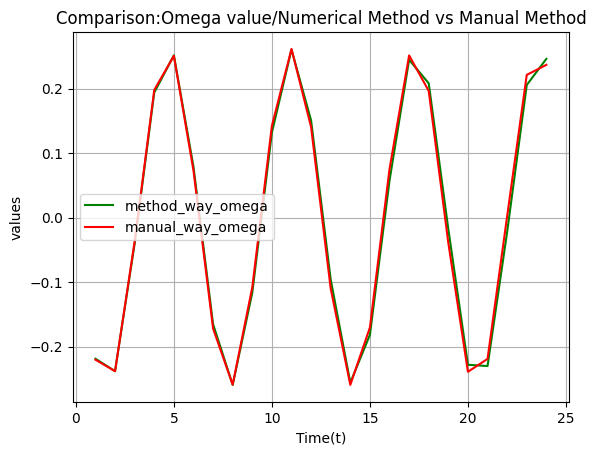

In [ ]:
#Omega value comparision between manually calulated and experimental data:
plt.title('Comparison:Omega value/Numerical Method vs Manual Method')
plt.plot(time_stamps, omega_rk4, label="method_way_omega",color='green')
plt.plot(time_stamps,omega_manual, label="manual_way_omega",color='red')
plt.xlabel('Time(t)')
plt.ylabel('values')
plt.grid(True)
plt.legend(loc='best')
plt.show()

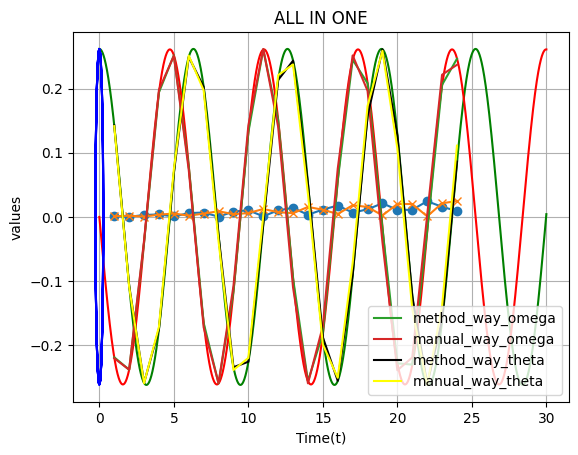

In [ ]:
#Plotting everything in one graph:
plt.title('ALL IN ONE')

plt.plot(t, theta, color='green')
plt.xlabel('Time')
plt.ylabel('Angular Displacement (θ)')

plt.plot(t, omega, color='red')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (ω)')

plt.plot(theta, omega, color='blue')
plt.xlabel('Angular Displacement(θ)')
plt.ylabel('Angular Velocity (ω)')

error_o = np.abs(np.array(omega_rk4) - np.array(omega_manual))
error_t = np.abs(np.array(theta_rk4) - np.array(theta_manual))
plt.plot(time_stamps, error_o, marker='o')
plt.plot(time_stamps, error_t, marker='x')
plt.xlabel('Time')
plt.ylabel('Absolute Error')

plt.plot(time_stamps, omega_rk4, label="method_way_omega")
plt.plot(time_stamps,omega_manual, label="manual_way_omega")
plt.xlabel('Time(t)')
plt.ylabel('values')

plt.plot(time_stamps, theta_rk4, label="method_way_theta",color='black')
plt.plot(time_stamps, theta_manual, label="manual_way_theta",color='yellow')
plt.xlabel('Time(t)')
plt.ylabel('values')

plt.legend(loc='lower right')
plt.grid()
plt.show()

# Where the Code Fails!! While doing Large angle calcluation...

If we take large angle our code fails, because the manual calculation we have done is based on small angle aproximation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dX_dt(t, X):
    theta, omega = X
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# Parameters
L = 9.8  # length of the pendulum
g = 9.81  # acceleration due to gravity

# Initial conditions
theta0 = np.pi/4  # initial angular displacement
omega0 = 0.0  # initial angular velocity

# Time steps
t0 = 0.0
t_end = 30.0
dt = 0.1
num_steps = int((t_end - t0) / dt)

# Arrays to store solutions
t = np.linspace(t0, t_end, num_steps)
theta_f = np.zeros(num_steps)
omega_f = np.zeros(num_steps)

# Initial values
theta_f[0] = theta0
omega_f[0] = omega0

# Runge-Kutta 4th order method
for i in range(1, num_steps):
    k1 = dt * dX_dt(t[i-1], [theta_f[i-1], omega_f[i-1]])
    k2 = dt * dX_dt(t[i-1] + dt/2, [theta_f[i-1] + k1[0]/2, omega_f[i-1] + k1[1]/2])
    k3 = dt * dX_dt(t[i-1] + dt/2, [theta_f[i-1] + k2[0]/2, omega_f[i-1] + k2[1]/2])
    k4 = dt * dX_dt(t[i-1] + dt, [theta_f[i-1] + k3[0], omega_f[i-1] + k3[1]])
    theta_f[i] = theta_f[i-1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
    omega_f[i] = omega_f[i-1] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6

# Calculate angular displacement at specific time stamps
specific_time_stamps = [1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0]  # Add your desired time stamps here
specific_displacements = []
for t_stamp in specific_time_stamps:
    idx = int((t_stamp - t0) / dt)
    specific_displacements.append(theta_f[idx])

# Calculate angular velocity at specific time stamps
specific_velocities = []
for t_stamp in specific_time_stamps:
    idx = int((t_stamp - t0) / dt)
    specific_velocities.append(omega_f[idx])

# Print the results
print("Angular Displacements at Specific Time Stamps:")
for t_stamp, displacement in zip(specific_time_stamps, specific_displacements):
    print(f"t = {t_stamp}: theta_f = {displacement}")

print("\nAngular Velocities at Specific Time Stamps:")
for t_stamp, velocity in zip(specific_time_stamps, specific_velocities):
    print(f"t = {t_stamp}: omega_f = {velocity}")


    


Angular Displacements at Specific Time Stamps:
t = 1.0: theta_f = 0.4531530475161397
t = 2.0: theta_f = -0.27495950308133027
t = 3.0: theta_f = -0.7605529272236222
t = 4.0: theta_f = -0.6006833939004189
t = 5.0: theta_f = 0.07777087090117683
t = 6.0: theta_f = 0.6872819438181448
t = 7.0: theta_f = 0.7085765411307479
t = 8.0: theta_f = 0.12484990988082843
t = 9.0: theta_f = -0.5694785175440642
t = 10.0: theta_f = -0.7707810965067038
t = 11.0: theta_f = -0.31876304480804796
t = 12.0: theta_f = 0.4138736469055935
t = 13.0: theta_f = 0.7840358469818196
t = 14.0: theta_f = 0.49074580302802406
t = 15.0: theta_f = -0.2301103403954728
t = 16.0: theta_f = -0.7476690489215329
t = 17.0: theta_f = -0.6297107388881903
t = 18.0: theta_f = 0.03039303960806862
t = 19.0: theta_f = 0.6635436292179908
t = 20.0: theta_f = 0.7273641486777093
t = 21.0: theta_f = 0.17144881217478025
t = 22.0: theta_f = -0.5361973762938796
t = 23.0: theta_f = -0.7783255790860522
t = 24.0: theta_f = -0.3613591462428287

Angula

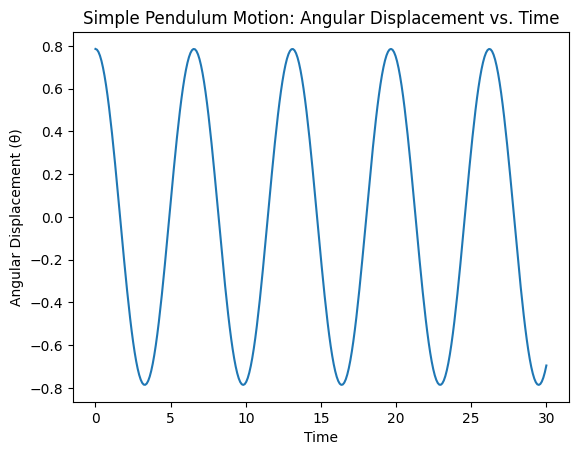

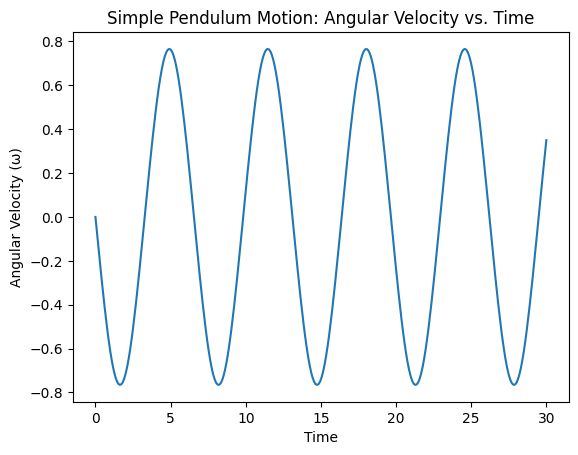

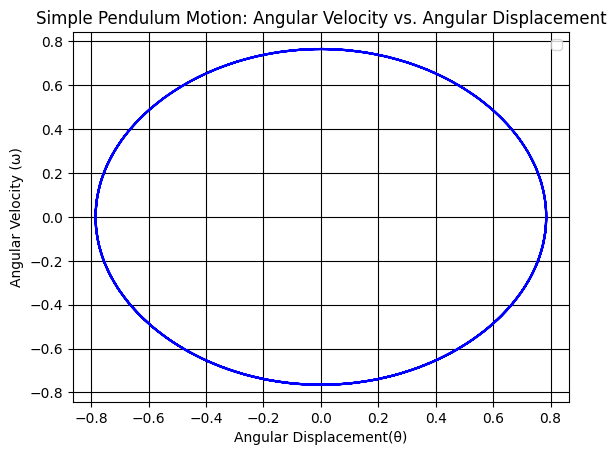

In [ ]:
# Plotting the solution
plt.plot(t, theta_f)
plt.xlabel('Time')
plt.ylabel('Angular Displacement (θ)')
plt.title('Simple Pendulum Motion: Angular Displacement vs. Time')
plt.show()

plt.plot(t, omega_f)
plt.xlabel('Time')
plt.ylabel('Angular Velocity (ω)')
plt.title('Simple Pendulum Motion: Angular Velocity vs. Time')
plt.show()

plt.plot(theta_f, omega_f, color='blue')
plt.grid(axis='both', which='both', color='black', linewidth=0.8)
plt.xlabel('Angular Displacement(θ)')
plt.ylabel('Angular Velocity (ω)')
plt.title('Simple Pendulum Motion: Angular Velocity vs. Angular Displacement')
plt.show()


In [ ]:
print(specific_velocities)

#and

print(specific_displacements)

[-0.6199358179593543, -0.7149683672405399, -0.18636409042695778, 0.48572184802077184, 0.7617955570489258, 0.36313498258064864, -0.3232187706488138, -0.7555134384232589, -0.5200249651175298, 0.14331825473700993, 0.6967985662272385, 0.6460269174887632, 0.04389083756159462, -0.5916972193691525, -0.7304874267827351, -0.22888917899898958, 0.449874831962818, 0.7651525651874699, 0.4019689850470736, -0.2823571116392357, -0.7463445332729728, -0.5526403209500493, 0.09987670979906092, 0.6760807106745189]
[0.4531530475161397, -0.27495950308133027, -0.7605529272236222, -0.6006833939004189, 0.07777087090117683, 0.6872819438181448, 0.7085765411307479, 0.12484990988082843, -0.5694785175440642, -0.7707810965067038, -0.31876304480804796, 0.4138736469055935, 0.7840358469818196, 0.49074580302802406, -0.2301103403954728, -0.7476690489215329, -0.6297107388881903, 0.03039303960806862, 0.6635436292179908, 0.7273641486777093, 0.17144881217478025, -0.5361973762938796, -0.7783255790860522, -0.3613591462428287]


In [ ]:
import pandas as pd
df = pd.read_csv('data_analytical_final.csv')
print (df.columns)
print(df)

Index(['time', 'small_angle_theta', 'small_angle_omega ', 'Unnamed: 3',
       'Unnamed: 4', 'big_angle_theta', 'big_angle_omega '],
      dtype='object')
    time  small_angle_theta  small_angle_omega   Unnamed: 3  Unnamed: 4  \
0      1           0.141451           -0.220297         NaN         NaN   
1      2          -0.108947           -0.238054         NaN         NaN   
2      3          -0.259179           -0.036945         NaN         NaN   
3      4          -0.171124            0.198130         NaN         NaN   
4      5           0.074263            0.251046         NaN         NaN   
5      6           0.251372            0.073151         NaN         NaN   
6      7           0.197371           -0.171999         NaN         NaN   
7      8          -0.038092           -0.259013         NaN         NaN   
8      9          -0.238533           -0.107892         NaN         NaN   
9     10          -0.219668            0.142424         NaN         NaN   
10    11           0

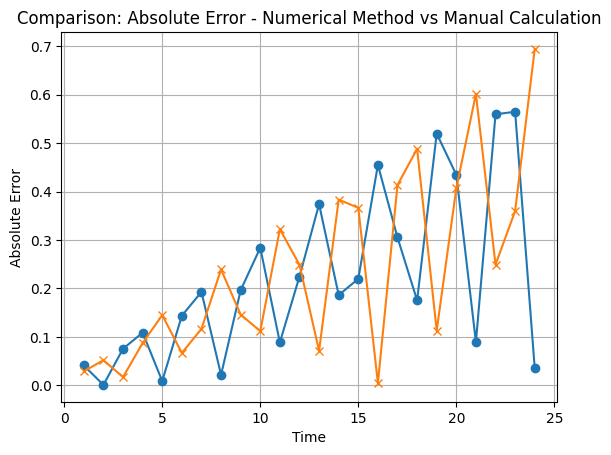

In [ ]:
#comparision:Absolute Error


# Values obtained using Runge-Kutta 4th Order Method
# Manually Calculated Values
b_omega_rk4 = [-0.6199358179593543, -0.7149683672405399, -0.18636409042695778, 0.48572184802077184, 0.7617955570489258, 0.36313498258064864, -0.3232187706488138, -0.7555134384232589, -0.5200249651175298, 0.14331825473700993, 0.6967985662272385, 0.6460269174887632, 0.04389083756159462, -0.5916972193691525, -0.7304874267827351, -0.22888917899898958, 0.449874831962818, 0.7651525651874699, 0.4019689850470736, -0.2823571116392357, -0.7463445332729728, -0.5526403209500493, 0.09987670979906092, 0.6760807106745189]
b_omega_manual = [-0.660889766020364,-0.714160529010916,-0.110835395148853,0.594391289869453,0.753137364157659,0.219452419110219,-0.515996068010473,-0.777040149840124,-0.323677101411014,0.427273181341951,0.785390471640358,0.421423384326351,-0.329998419043792,-0.778021197810754,-0.510734875339093,0.226118736144776,0.755079824417117,0.589824004349381,-0.117713285204417,-0.717025523203902,-0.657107801902338,0.00695180206034598,0.664619951268625,0.711239582332472] 

# Values obtained using Runge-Kutta 4th Order Method
b_theta_rk4 = [0.4531530475161397,-0.27495950308133027,-0.7605529272236222,-0.6006833939004189,0.07777087090117683,0.6872819438181448,0.7085765411307479,0.12484990988082843,-0.5694785175440642,-0.7707810965067038,-0.31876304480804796,0.4138736469055935,0.7840358469818196,0.49074580302802406,-0.2301103403954728,-0.7476690489215329,-0.6297107388881903,0.03039303960806862,0.6635436292179908,0.7273641486777093,0.17144881217478025,-0.5361973762938796,-0.7783255790860522,-0.3613591462428287]
# Manually Calculated Values
b_theta_manual = [0.424352438708243,-0.326840961127784,-0.777538288607244,-0.513370499342739,0.222787759488124,0.754115979683999,0.592113445942427,-0.114275459327552,-0.715600034300061,-0.659005237895734,0.00347593507156687,0.662761349364165,0.71270703553191,0.107393160048509,-0.596657491514559,-0.752143997006141,-0.216112780340035,0.518611529915549,0.776526791266385,0.320506901863682,-0.430185555019183,-0.785367396519743,-0.418486075567366,0.33314941331423] 

# Time stamps
time_stamps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# Calculate absolute errors
b_error_o = np.abs(np.array(b_omega_rk4) - np.array(b_omega_manual))
b_error_t = np.abs(np.array(b_theta_rk4) - np.array(b_theta_manual))
# Plotting the absolute error
plt.plot(time_stamps, b_error_o, marker='o')
plt.plot(time_stamps, b_error_t, marker='x')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.title('Comparison: Absolute Error - Numerical Method vs Manual Calculation')
plt.grid(True)
plt.show()


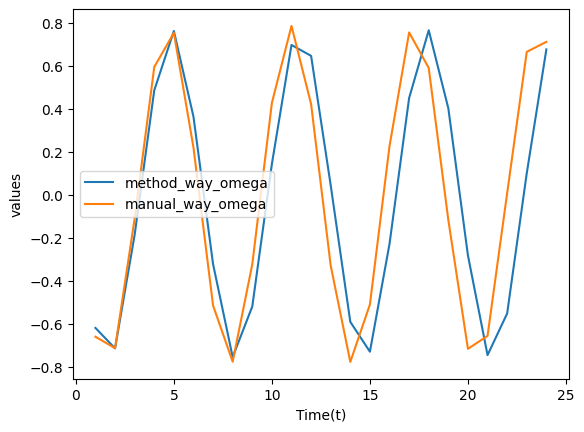

In [ ]:
#Theta value comaparision
import numpy as np
import matplotlib.pyplot as plt
plt.plot(time_stamps, b_omega_rk4, label="method_way_omega")
plt.plot(time_stamps,b_omega_manual, label="manual_way_omega")
plt.xlabel('Time(t)')
plt.ylabel('values')
plt.legend()
plt.show()

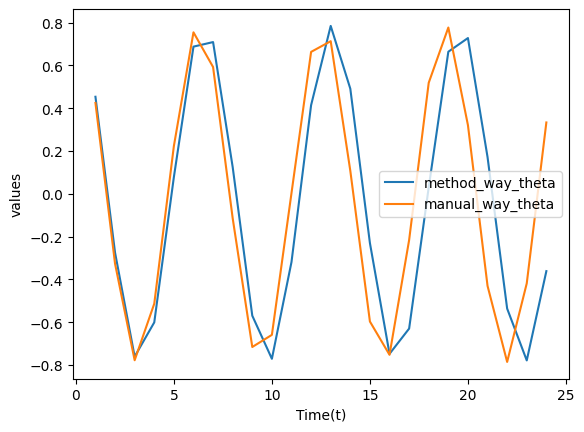

In [ ]:
#Omega value comaparision
plt.plot(time_stamps, b_theta_rk4, label="method_way_theta")
plt.plot(time_stamps,b_theta_manual, label="manual_way_theta")
plt.xlabel('Time(t)')
plt.ylabel('values')
plt.legend()
plt.show()